**LOGISTIC REGRESSION - RAIN IN AUSTRALIA**

In this session we will explore the rain in Australia dataset. This dataset contains daily weather observations from numerous Australian weather stations for approximately 10 years (22 data columns+target variable).

The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.

![alt text](NASAAus.jpeg "Satellite image of Austrlia with level of rain depicted")

<img src="rainAus.jpeg" width="400" height="200">

To accurately draw conclusions from the data, we must know and understand the input and target variables.

<u>Examples of what columns (representing variables) the dataset has</u>:
- "Date": The date of observation
- "Location":The common name of the location of the weather station
- "Rainfall":  The amount of rainfall recorded for the day in mm
- "Evaporation" : The so-called Class A pan evaporation (mm) - how much water evaporates in the 24 hours to 9am
- "Sunshine" : The number of hours of bright sunshine in the day.
- "WindGustDir": The direction of the strongest wind gust in the 24 hours to midnight (W=West, E=East, NW=North-west and similar)
- "WindGustSpeed" : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- "WindDir9am" : Direction of the wind at 9am (W=West, E=East, NW=North-west and similar)
- "WindDir3pm" : Direction of the wind at 3pm (W=West, E=East, NW=North-west and similar)
- "WindSpeed9am": Wind speed (km/hr) averaged over 10 minutes prior to 9am
- "WindSpeed3pm": Wind speed (km/hr) averaged over 10 minutes prior to 3am
- "MinTemp": The minimum temperature for the day in degrees celsius
- "MaxTemp": The maximum temperature for the day in degrees celsius
- "Humidity9am": Humidity (percent) at 9am
- "Pressure9am": Atmospheric pressure (hpa = hectoPascals or millibars) reduced to mean sea level at 9am
- "Humidity3am": Humidity (percent) at 3pm
- "Pressure3pm": Atmospheric pressure (hpa = hectoPascals or millibars) reduced to mean sea level at 3pm
- "Cloud9am": Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- "Cloud3pm": Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- "Temp9am": Temperature (degrees C) at 9am
- "Temp3pm": Temperature (degrees C) at 3pm
- "RainToday": 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

The <u>target</u> (called **RainTomorrow**) means: did it rain the next day? The possible values are "Yes" or "No", with yes meaning that that there was at least 1mm of rain or more.

We will use **logistic regression model** to predict the RainTomorrow variable. 




**1. IMPORTING LIBRARIES**

In [1]:
#First we need to import the libraries with functions and data types/structures that we are going to use
#ToDo: discuss if you are familiar with the libraries and what the purpose of each one is
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**2. DATA PREPARATION**

**2.1. Importing Data**

In [2]:
#We also beed to load the dataset
#ToDo: load the data from csv file
data = pd.read_csv('./weatherAUS.csv')
#ToDo: look at a few entries to get a feeling for what the data is like
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
32041,2013-06-08,Sydney,13.5,19.2,0.0,3.0,1.5,SSE,43.0,W,...,73.0,53.0,1030.7,1028.6,7.0,7.0,14.2,17.5,No,No
93794,2010-04-29,Townsville,21.9,29.9,0.2,1.8,7.8,ENE,35.0,ESE,...,59.0,49.0,1019.6,1016.4,7.0,4.0,25.6,28.7,No,No
72912,2016-02-22,Mildura,18.4,41.2,0.0,8.0,10.1,NW,30.0,ENE,...,26.0,11.0,1019.8,1016.3,1.0,5.0,26.7,38.9,No,No
128050,2012-06-05,Walpole,13.1,18.6,0.0,NaN,NaN,NE,43.0,NNE,...,65.0,57.0,1021.8,1018.8,NaN,NaN,14.0,17.7,No,No
17360,2015-06-01,Newcastle,9.2,16.8,6.3,NaN,NaN,NaN,NaN,NW,...,69.0,30.0,NaN,NaN,2.0,1.0,13.2,15.0,Yes,No


**2.2. Exploring Data**

In [3]:
#In the random data points we see NaN. How common is that? 
#How we deal with these missing values depends on how many of them there are in out dataset.
#ToDo: calculate how many NaN there are overall
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

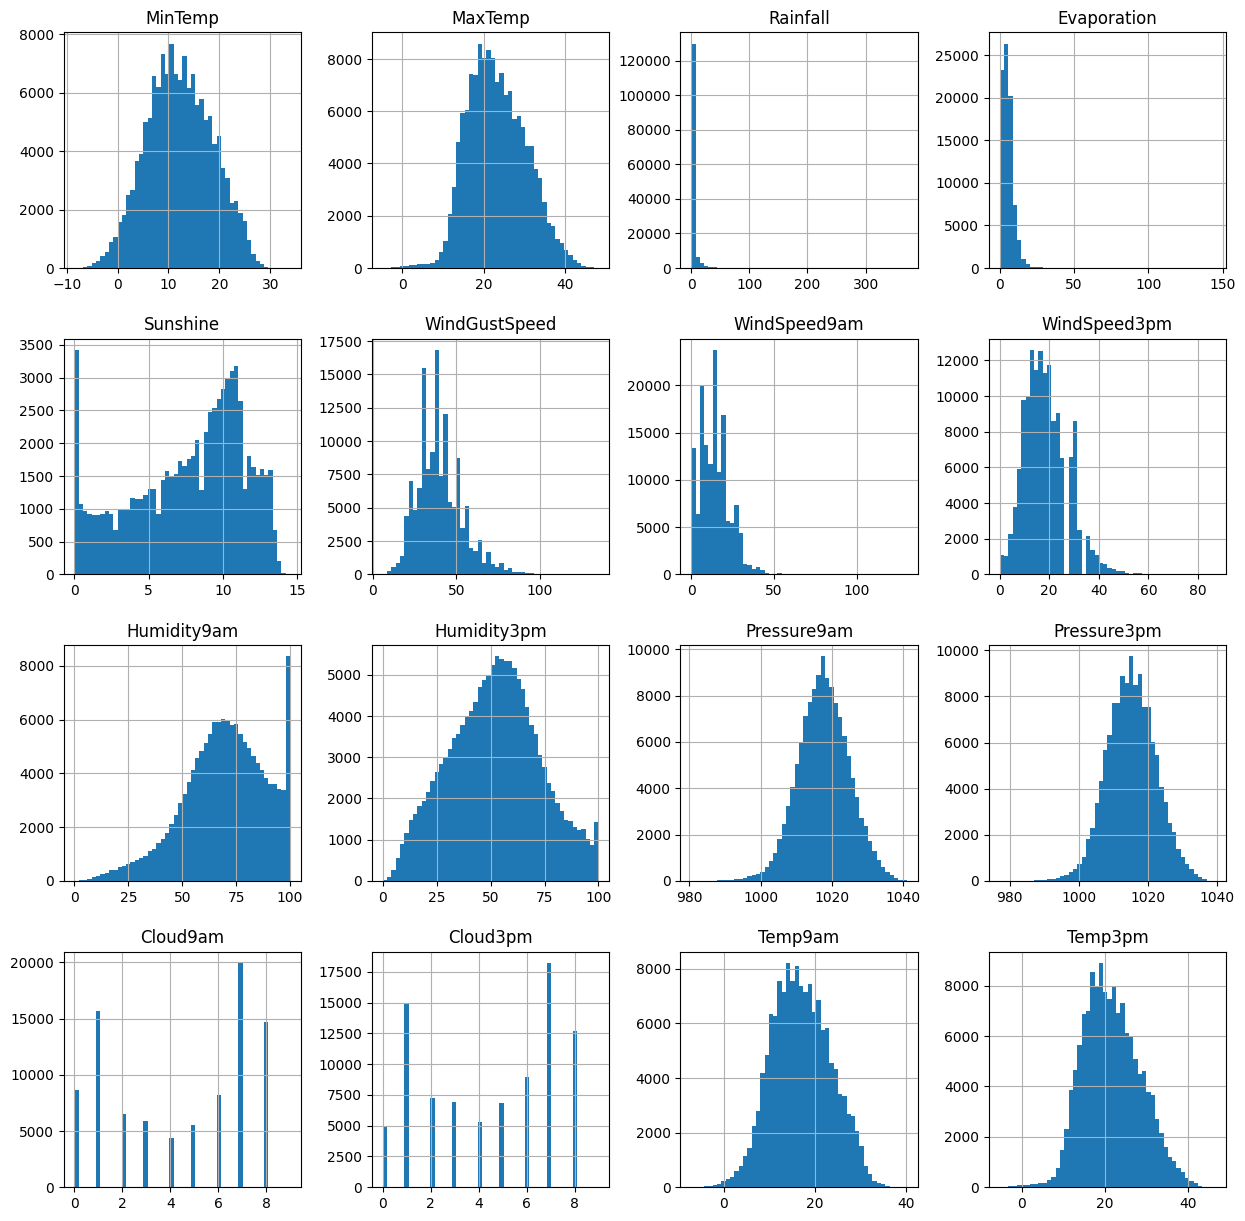

In [4]:
#To explore the range of values for each variable, we can create a histogram 
#ToDo: visualise histograms of some columns with calling a .hist() function from data
#Try parameters bins=50 and figsize=(15, 15) [size of resulting figure]
hist = data.hist(bins=50, figsize=(15, 15))

Not all column were visualised. Why?
The hist function only wok with numbers, so let's convert our strings to numbers.

In [5]:
#How predictive of our target value is each variable (column)? 
#To understand this, we calculate correlation
#Correlation - to which degree to 2 variables change together? 
#Example - temperature outside and how much water evaporates per given time are very connected
#We need to change strings to numbers to calculate the correlation
import copy

data_categorical = copy.deepcopy(data)

data_categorical['Location']=data_categorical['Location'].astype('category').cat.codes
data_categorical['RainToday']=data_categorical['RainToday'].astype('category').cat.codes
data_categorical['WindDir9am']=data_categorical['WindDir9am'].astype('category').cat.codes
data_categorical['WindDir3pm']=data_categorical['WindDir3pm'].astype('category').cat.codes
data_categorical['WindGustDir']=data_categorical['WindGustDir'].astype('category').cat.codes
data_categorical['RainTomorrow']=data_categorical['RainTomorrow'].astype('category').cat.codes

#ToDo: calculate the correlation for all the variables in the data_categorical with the 'RainTomorrow' target
data_categorical.corr()['RainTomorrow']

Location        -0.013112
MinTemp          0.074597
MaxTemp         -0.145877
Rainfall         0.224268
Evaporation     -0.109716
Sunshine        -0.408096
WindGustDir      0.050768
WindGustSpeed    0.206299
WindDir9am       0.039284
WindDir3pm       0.027859
WindSpeed9am     0.070565
WindSpeed3pm     0.072610
Humidity9am      0.233368
Humidity3pm      0.406050
Pressure9am     -0.226648
Pressure3pm     -0.208366
Cloud9am         0.291214
Cloud3pm         0.355419
Temp9am         -0.025140
Temp3pm         -0.176824
RainToday        0.329409
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

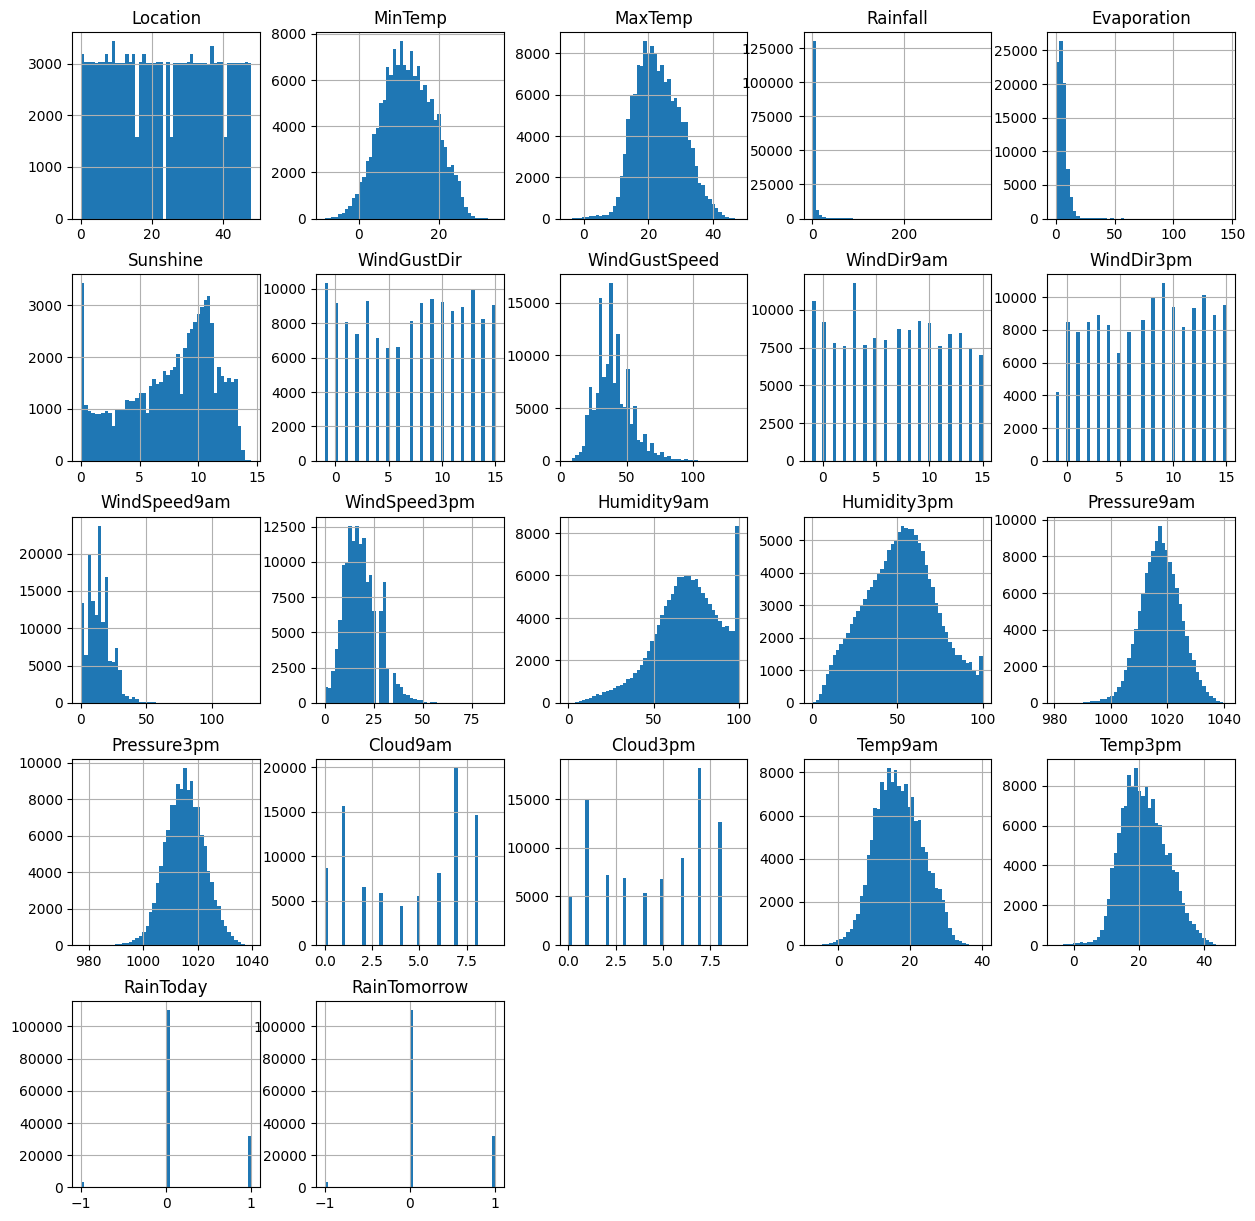

In [6]:
#To explore the range of values for each variable, we can create a histogram 
#ToDo: visualise histograms of some columns with calling a .hist() function from data_categorical
#Try parameters bins=50 and figsize=(15, 15) [size of resulting figure]
hist = data_categorical.hist(bins=50, figsize=(15, 15))

**2.3. Cleaning Data**

In [7]:
# We see that not all columns are equally useful for predicting the probability of rain
# ToDo: Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Missing data imputation**

<u>Missing data imputation</u> - replacing missing data with an estimated value based on other available information, allowing to keep all data points (especially important in small datasets) 

<img src="miss_val.png" width="400" height="200">


Every subject in a randomly chosen sample can be replaced by a new subject that is randomly chosen from the same source population as the original subject, without compromising the conclusions. Imputation techniques are also based on this basic principle of replacement. *["Review: A gentle introduction to imputation of missing values", A. Rogier et al., 2006, Journal of Clinical Epidemiology 59 (2006) 1087e1091]*

The right type of missing value imputation to choose depends on the type of missing data.

<u>Types of missing data</u>:
1. **Missing completely at random**
- accidental breaking, deletion of data, corruption, contamination etc.
- can be correctly imputed by simplest methods
2. **Missing not at random**
- reason for missingness ... is related to *unobserved* ... characteristics
- almost impossible to correctly impute 
3. **Missing at random**
- reason for missingness is based on other *observed* ... characteristics
- missing data can ... be considered random conditional on these other patient characteristics that determined their missingness and that are available at the time of analysis 
- all simple techniques for handling missing data, i.e., complete and available case analyses, the indicator method and overall mean imputation, give biased results. 

Here we will use **mean value imputation** (for each variable, which is represented by a column in the dataset, the missing value will be replaced by the mean of that variable/column)

<img src="mean_imp_example.png" width="400" height="200">

Feel free to experiment and explore further!


In [8]:
#The simple algorithms often either cannot run on datasets with missing data, or ignore the samples with missing data
#ToDo: replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

/var/folders/rh/wqjw407133jfhj_bhjtl3tgj23ky7h/T/ipykernel_77080/4128306530.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


**2.4. Converting Predictions to Binary for Logistic Regression**

In [9]:
#The algorithm was programmed to deal with numbers, not strings
#ToDo: change that day and next days'predictions (strings "Yes" and "No") to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
73062,12.0,21.1,0.0,5.468232,5.700000,35.0,11.0,17.0,100.0,64.0,1017.2,1012.7,8.000000,3.00000,14.7,20.9,0,0
57733,11.4,17.7,0.0,5.468232,7.611178,37.0,19.0,28.0,88.0,65.0,1021.9,1020.4,4.447461,2.00000,12.9,17.1,0,0
105239,1.6,17.4,0.0,1.200000,9.300000,31.0,13.0,20.0,66.0,36.0,1024.4,1021.7,2.000000,4.50993,9.9,16.6,0,0


**2.5. Excluding Tomorrow's Prediction from the Dataset**

In [10]:
#The algorithm needs to know what is the target variable and what is the data
#ToDo: separate the data[x_data] and the target variable[y]
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


**2.6. Data Normalization**

<u>Data normalization</u> - transforming the range of features to a common (usually standard) scale (often 0-1). 

**Motivation**: 
1. Normalized data enhances model performance and improves the accuracy of a model.
- all features contribute equally
- the trends and variations are more visible and easily identifiable
2. Makes the training more stable.

<img src="norm.png" width="400" height="200">

**Types of normalization:** <br>
1)<u>Min-Max Scaling</u> <br>

Min-max scaling is very often simply called ‘normalization.’ It transforms features to a specified range, typically between 0 and 1. The formula for min-max scaling is:<br>

**X_normalized** = (x - min(x)) / (max(x) - min(x)) <br>

That most often used technique works when:
- The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers
- The data distribution is unknown or non-Gaussian, and the data is approximately uniformly distributed across the range

2) <u>Z-score normalization (standardization)</u><br>

Z-score normalization assumes a Gaussian (bell curve) distribution of the data and transforms features to have a mean (μ) of 0 and a standard deviation (σ) of 1. The formula for standardization is:

**X_standardized** = x−μ / σ

- This technique is particularly useful when dealing with algorithms that assume normally distributed data, such as many linear models. 

3)<u>Decimal scaling normalization</u>

The objective of decimal scaling normalization is to scale the feature values by a power of 10, ensuring that the largest absolute value in each feature becomes less than 1. It is useful when the range of values in a dataset is known, but the range varies across features. The formula for decimal scaling normalization is:

**X_decimal** = X / 10d

Where X is the original feature value, and d is the smallest integer such that the largest absolute value in the feature becomes less than 1.

- Decimal scaling normalization is advantageous when dealing with datasets where the absolute magnitude of values matters more than their specific scale.

4)<u>Log scaling normalization</u>

Log scaling normalization converts data into a logarithmic scale, by taking the log of each data point. It is particularly useful when dealing with data that spans several orders of magnitude. The formula for log scaling normalization is:

**X_log** = log(X)

- This normalization comes in handy with data that follows an exponential growth or decay pattern. It compresses the scale of the dataset, making it easier for models to capture patterns and relationships in the data. Population size over the years is a good example of a dataset where some features exhibit exponential growth. 
- Log scaling normalization can make these features more amenable to modeling.

5)<u>Robust scaling normalization</u>

Robust scaling normalization is useful when working with datasets that have outliers. It uses the median and interquartile range (IQR) instead of the mean and standard deviation to handle outliers. The formula for robust scaling is:

**Xrobust** = X – median/ IQR

- Since robust scaling is resilient to the influence of outliers, this makes it suitable for datasets with skewed or anomalous values.


**We will use the min-max scaling here**, but feel free to try different and more complex techniques.

In [11]:
#We see (from the histograms) that the range of values in features is very different.
# ToDo: perform normalization on the rain dataset:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


**2.7. Dividing Dataset for Training and Testing the Model**

To evaluate the performance of your model fairly, some part of the data needs to remain unseen and unknown to the model. Similar to exam preparation questions and actual exams, the data on which the model trains needs to be similar and representative of the data the model will have to work on, but not identical.

<u> Representative sample </u>: A representative sample is defined as a small quantity or a subset of something larger. It represents the same properties and proportions like that of a larger population.

<img src="repr.jpg" width="400" height="200">

To achieve that, we divide the data into:
- **Train set** (on which we train the model)
- **Test set** (on which we test the model performance)

Choosing a representative subset for the test set is crucial for a correct estimation of the performance of your model. When the dataset is very small or non-uniform, there are more complex techniques to ensure this similarity between the test set and the whole dataset.

For the beginning, let's just hope the dataset is uniform and large enough and train on randomly chosen 80% of the available data.

In [26]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

#ToDo: get the train and test x and y by calling the train_test_split on the whole x and 
#whole y with the test_size of 0.2 and random_state of 75 (ensures reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis: ToDo explain
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 116368)
y_train shape is:  (116368,)
x_test shape is:  (17, 29092)
y_test shape is:  (29092,)


In [13]:
#BONUS : modify split to reflect stratification by several categories*+

**3. LOGISTIC REGRESSION**

Short reminder of what logistic regression is (including sigmoid function)
**ToDo: put more info**

**3.1. Creating the Initial Parameters (Weight and Bias)**

In [14]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

**3.2. Defining the Sigmoid Function**

Sigmoid Function is used to scale z values between 0 and 1. But this is not the same thing as the normalization.

Sigmoid function is used for explaining propability.

Let's say we have used our weight, bias and x values in this formula: **z = w*x + b**

And let's say our result for **z=5**. And when we apply it to sigmoid function we have **y_head=0.8**

**That means our model's prediction's result is 1. Because all y_head values above 0.5 (treshold value) on the graph are 1 in the sigmoid function graph.** If we have y_head = 0.4 that means our model's prediction is 0. 

Here is the sigmoid function's graph:
![](https://imgur.com/z1hx3dc.png)

In [15]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

**3.3. Defining Forward and Backward Propagation**

Loss function tells us if our model's prediction is correct or wrong. If the value of loss function is 1 that means our model's prediction is wrong.

Loss (error) function formula = -(1 - y) * log(1 - y_head) - y * log(y_head)

Cost function is the summation of all the loss functions. If cost function is high that means our model makes more mistakes in it's predictions.

In [16]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

**3.4. Defining Update Parameters Method**

During the forward and backward propagation stages the model needs to update the weights and biases.

This update depends on the model's chosen learning rate.

In [17]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

**3.5. Defining Prediction Method**

Now we can define our prediction method. For our model's training we have used training data but for prediction we will be using our test data.



In [18]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

**3.6. Implementing Logistic Regression Using Test Data**

Now it's time for using our x_test data and defined methods to predict y_prediction values. 

Then we will use our predictions (y_test_predictions) and real y values (y_test) to compare and calculate our model's accuracy.

In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Let's test our model. Use logistic_regression method, train and test data, with a learning rate of 1 and run the forward backward propagation 400 times to train our model. And then show us our cost function (which should decline by the number of iterations) and accuracy of the model.

Cost after iteration 0: 0.711796
Cost after iteration 20: 0.454102
Cost after iteration 40: 0.427864
Cost after iteration 60: 0.415115
Cost after iteration 80: 0.406957
Cost after iteration 100: 0.401044
Cost after iteration 120: 0.396494
Cost after iteration 140: 0.392870
Cost after iteration 160: 0.389918
Cost after iteration 180: 0.387469
Cost after iteration 200: 0.385411
Cost after iteration 220: 0.383661
Cost after iteration 240: 0.382161
Cost after iteration 260: 0.380865
Cost after iteration 280: 0.379737
Cost after iteration 300: 0.378750
Cost after iteration 320: 0.377883
Cost after iteration 340: 0.377116
Cost after iteration 360: 0.376435
Cost after iteration 380: 0.375828


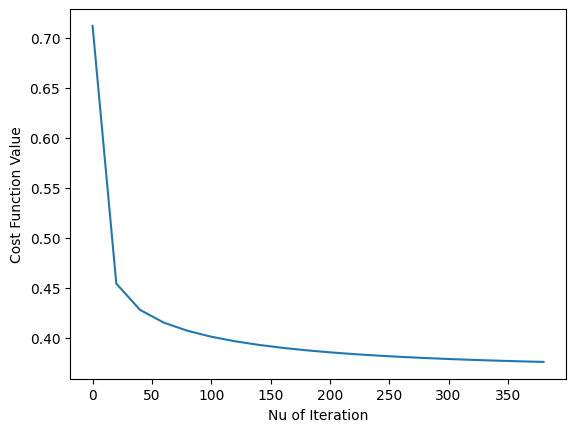

Test accuracy: 83.31843805857281%


In [20]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

**4. LOGISTIC REGRESSION WITH SKLEARN LIBRARY**

In [21]:
# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))

Test accuracy of sklearn logistic regression library: 0.8403341124707824


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**5. CONCLUSION**

Logistic regression is a very important subject for understanding machine learning and first step to deep learning.

In [22]:
#look at some predictions - good and bad

In [23]:
#visualise the confusion matrix for logistic regression

In [24]:
#look at other metrics (precision/recall, F etc.)

In [25]:
#BONUS EXCERCISE : improve model (hyperparameters?)